# Problem Statement
- Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available. (However, that code could be a useful resource to refer to). OR,
- Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!
### Outline
- data
- RBM
- results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM

# data

In [2]:
df = pd.read_csv("data/birdsong_metadata.csv")[['genus','species','english_cname','country']]
display(df.head())
# number of unique values for each feature
for col in df.columns:
    print (col,len(df[col].value_counts()))

,genus,species,english_cname,country
0,Acanthis,flammea,Common Redpoll,Poland
1,Acanthis,flammea,Common Redpoll,Poland
2,Acanthis,flammea,Common Redpoll,Netherlands
3,Acrocephalus,palustris,Marsh Warbler,United Kingdom
4,Acrocephalus,palustris,Marsh Warbler,United Kingdom


genus 66
species 85
english_cname 88
country 18


In [3]:
# simulate putting audio data into dataframe
d = pd.DataFrame([['a','b'],['c','d']], columns = ['feat1','feat2'])
a = []
a.append([1,2,3])
a.append([4,5,6])
print (a)
print (pd.concat([d,pd.DataFrame(a)],axis = 1))

[[1, 2, 3], [4, 5, 6]]
  feat1 feat2  0  1  2
0     a     b  1  2  3
1     c     d  4  5  6


In [4]:
all_clips = []
clip_num = 0
for file in os.listdir("data/songs")[:20]:
    data, Fs = sf.read("data/songs/" + file)
    n = 0
    hop = int(Fs/2)
    while n < (len(data) - hop):
        all_clips.append(data[n:n+hop])
        n += hop
    #if len(all_clips) > 1000:
    #    break
    clip_num+=1
X_clips = pd.DataFrame(all_clips)
print ("rows:",len(all_clips),"\tcolumns:",len(all_clips[0]))
print (clip_num,"clips used")

rows: 2544 	columns: 22050
20 clips used


129 by 98 = 12642


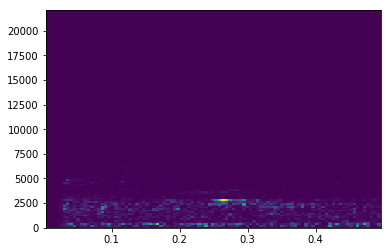

In [5]:
f, t, Sxx = signal.spectrogram(all_clips[0],Fs)
print (len(Sxx),"by",len(Sxx[0]),"=",(len(Sxx) * len(Sxx[0])))
plt.pcolormesh(t,f,Sxx)
plt.show()

In [6]:
# get spectrogram of all_clips
all_specs = []
for clip in all_clips:
    f_temp,t_temp,Sxx_temp = signal.spectrogram(clip,Fs)
    all_specs.append(Sxx_temp.ravel())
X_specs = pd.DataFrame(all_specs)
print (len(all_specs),"by",len(all_specs[0]),"=",(len(all_specs)*len(all_specs[0])))

2544 by 12642 = 32161248


# rbm

In [7]:
rbm = BernoulliRBM(random_state=42)
rbm.n_components = 10
rbm.fit(X_specs)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=10, n_iter=10,
       random_state=42, verbose=0)

# results

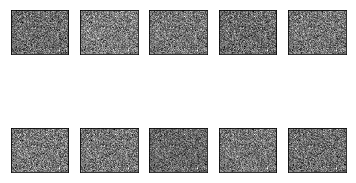

In [8]:
for i, comp in enumerate(rbm.components_):
    plt.subplot(2, 5, i + 1)
    plt.imshow(comp.reshape((len(Sxx[0]), len(Sxx))), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())